https://www.kaggle.com/PromptCloudHQ/imdb-data

### IMDB data from 2006 to 2016

Here's a data set of 1,000 most popular movies on IMDB from 2006 to 2016. The data points included are:

Title, Genre, Description, Director, Actors, Year, Runtime, Rating, Votes, Revenue, Metascrore

**INSTRUCTIONS:**

Go to File -> Save a Copy in Drive and edit this notebook in your copy

 `pass` in the below code is just placeholder. You need to replace `pass` with your code

 The total marks of this assignment is 250. You are expected to get at least 75%

 Put all your doubts on Discord channel

 Marks will not be given if the code is plagiarised

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('IMDB-Movie-Data.csv')


FileNotFoundError: [Errno 2] No such file or directory: 'IMDB-Movie-Data.csv'

### 1. Display Top 10 Rows of The Dataset (1 mark)

In [ ]:
data.head(10)

### 2. Check Last 10 Rows of The Dataset (1 mark)

In [ ]:
data.tail(10)

### 3. Find Shape of Our Dataset (Number of Rows And Number of Columns) (2 marks)

In [ ]:
data.shape

In [ ]:
print(f"Number of rows: {data.shape[0]}")
print(f"Number of columns: {data.shape[1]}")

### 4. Getting Information About Dataset (5 Marks)
Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [ ]:
data.info()

### 5. Check Missing Values In The Dataset (8 = 2+3+3 marks)

In [ ]:
data.isnull()

Find of null values in each column

Hint: Use `sum()`

In [ ]:
data.isnull().sum()

Find total number of null values in dataframe

In [ ]:
data.isnull().sum().sum()

### 6. Drop All The  Missing Values (15 = 5+5+5 marks)

In [ ]:
data.dropna(inplace = True)

In [ ]:
data

Reset the index of dataframe

In [ ]:
data.reset_index(inplace = True)

In [ ]:
data

Drop the columns "index" and "Rank"

In [ ]:
data.drop(['index', 'Rank'], axis = 1, inplace = True)

In [ ]:
data

Check the shape of dataframe

In [ ]:
data.shape

### 7. Get Overall Statistics About The DataFrame (5 marks)

In [ ]:
data.describe()

### 8. Display Title of The Movie Having Runtime >= 180 Minutes (10 marks)

In [ ]:
filt = (data['Runtime (Minutes)'] >= 180)
data[filt]['Title']

71     The Wolf of Wall Street
77           The Hateful Eight
277             La vie d'Adèle
Name: Title, dtype: object

### 9. In Which Year There Was The Highest Average Voting? (15 marks)

Hint: Use `groupby()`

In [ ]:
year_grp = data.groupby(by = 'Year')
year_avg_voting = year_grp['Votes'].mean(numeric_only = True).sort_values(axis = 0, ascending = False)
year_avg_voting

Year
2012    290861.483871
2006    277232.219512
2009    267180.577778
2008    266580.145833
2007    266530.704545
2010    261082.929825
2011    259254.736842
2013    225531.892857
2014    211926.881720
2015    129512.651376
2016     68437.823232
Name: Votes, dtype: float64

### 10. In Which Year There Was The Highest Average Revenue? (20 marks)

Caution: Set `numeric_only` to `True`

In [ ]:
year_grp = data.groupby(by = 'Year')
year_avg_revenue = year_grp['Revenue (Millions)'].mean(numeric_only = True).sort_values(axis = 0, ascending = False)
year_avg_revenue

Year
2009    115.742000
2012    110.103065
2010    105.081579
2008     97.525417
2011     93.703333
2007     93.074091
2013     88.084643
2006     87.255610
2014     85.433656
2015     80.725596
2016     55.566111
Name: Revenue (Millions), dtype: float64

### 11. Find The Average Rating For Each Director (30 marks)

Caution: Set `numeric_only` to `True`

In [ ]:
director_grp = data.groupby(by = 'Director')
director_avg_rating = director_grp['Rating'].mean(numeric_only = True).sort_values(axis = 0, ascending = False)
director_avg_rating

Director
Christopher Nolan                   8.68
Olivier Nakache                     8.60
Makoto Shinkai                      8.60
Florian Henckel von Donnersmarck    8.50
Aamir Khan                          8.50
                                    ... 
Sam Taylor-Johnson                  4.10
Joey Curtis                         4.00
George Nolfi                        3.90
James Wong                          2.70
Jason Friedberg                     1.90
Name: Rating, Length: 524, dtype: float64

### 12. Display Top 14 Lengthy Movies Title and Runtime (50 marks)



1.   Sort the `Runtime (Minutes)`in descending order
2.   Slice the first 14 values
3.
Find the threshold for top 14 lengthy movies
4. Display Title and Runtime of top 14 lengthy movies





In [ ]:
#Step 1 and 2
data_we_need = data.iloc[:,[0,6]]
data_we_need.sort_values(by = 'Runtime (Minutes)', ascending = False).iloc[:14,1]

77     187
71     180
277    180
239    172
380    170
64     169
31     169
242    169
377    166
110    165
832    165
564    165
604    165
127    165
Name: Runtime (Minutes), dtype: int64

Step 3: The threshold is >=165 minutes

In [ ]:
#Step 4
filt = (data_we_need['Runtime (Minutes)'] >=165)
data_we_need[filt]

,Title,Runtime (Minutes)
31,Interstellar,169
64,Pirates of the Caribbean: At World's End,169
71,The Wolf of Wall Street,180
77,The Hateful Eight,187
110,Transformers: Age of Extinction,165
127,Django Unchained,165
239,Cloud Atlas,172
242,The Hobbit: An Unexpected Journey,169
277,La vie d'Adèle,180
377,The Curious Case of Benjamin Button,166


Create a new dataframe `data_plot` to store the above displayed dataframe

In [ ]:
data_plot = data_we_need[filt]

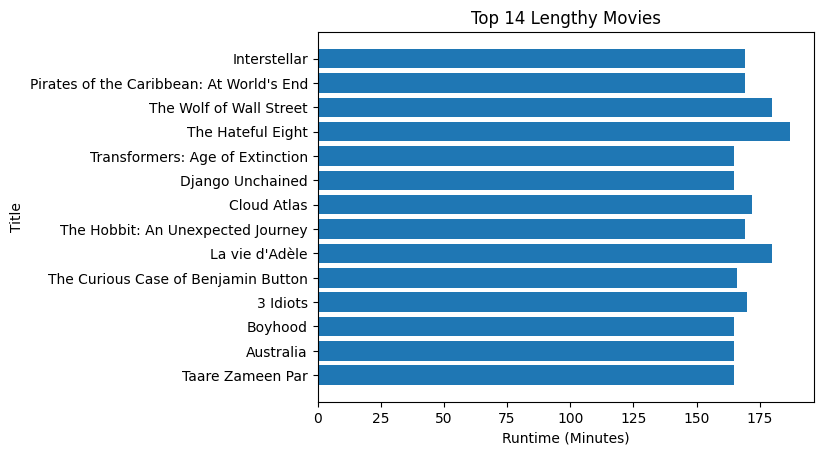

In [ ]:
fig, ax = plt.subplots()

ax.barh(data_plot.iloc[:,0], data_plot.iloc[:,1]) #Use iloc()

# Add title and axis labels : Look at the given output below and decide the title and axis labels
ax.set_title('Top 14 Lengthy Movies')
ax.set_xlabel('Runtime (Minutes)')
ax.set_ylabel('Title')

# Customize appearance
ax.invert_yaxis()
plt.show()


### 13. Display Number of Movies Per Year (15 marks)

Hint: Use `size()`




In [ ]:
year_grp = data.groupby(by = 'Year')
num_movies = year_grp.size()
num_movies

Year
2006     41
2007     44
2008     48
2009     45
2010     57
2011     57
2012     62
2013     84
2014     93
2015    109
2016    198
dtype: int64

### 14. Find Most Popular Movie Title (Higest Revenue) (15 marks)

In [ ]:
data.sort_values(by = 'Revenue (Millions)', ascending = False)['Title'].head(1)

41    Star Wars: Episode VII - The Force Awakens
Name: Title, dtype: object

### 15. Does Rating Affect The Revenue? (20 marks)

Plot a scatter plot between Rating and Revenue

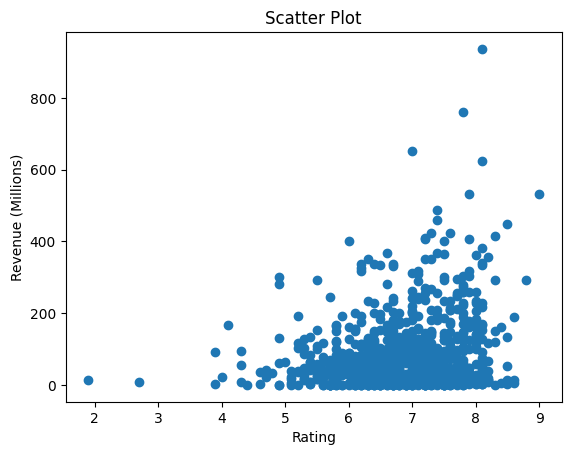

In [ ]:
fig, ax = plt.subplots()

# Create scatter plot
ax.scatter(data.iloc[:,7], data.iloc[:,9])

# Add title and axis labels : Look at the given output below and decide the title and axis labels
ax.set_title('Scatter Plot')
ax.set_xlabel('Rating')
ax.set_ylabel('Revenue (Millions)')

# # Customize appearance
plt.show()

### 16. Classify Movies Based on Ratings [Excellent, Good and Average] (40 marks)


Create a new column `rating_cat`
*   Excellent: >=7.5
*   Good: >=6 && <7.5
* Average: <6




In [ ]:
import numpy as np

Create a null column `rating_cat` using `np.nan`

In [ ]:
data['rating_cat'] = np.nan

Use `iloc`, for loops and if conditions to fill the column `rating_cat`

In [ ]:
for i in range(len(data)):
  if data['Rating'][i] >= 7.5:
    data.iloc[i,-1] = "Excellent"
  elif data['Rating'][i] >= 6:
    data.iloc[i,-1] = "Good"
  else:
    data.iloc[i,-1] = "Average"

In [ ]:
data

,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,rating_cat
0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,Excellent
1,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,Good
2,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,Good
3,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,Good
4,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,Good
...,...,...,...,...,...,...,...,...,...,...,...,...
833,Resident Evil: Afterlife,"Action,Adventure,Horror",While still out to destroy the evil Umbrella C...,Paul W.S. Anderson,"Milla Jovovich, Ali Larter, Wentworth Miller,K...",2010,97,5.9,140900,60.13,37.0,Average
834,Project X,Comedy,3 high school seniors throw a birthday party t...,Nima Nourizadeh,"Thomas Mann, Oliver Cooper, Jonathan Daniel Br...",2012,88,6.7,164088,54.72,48.0,Good
835,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0,Average
836,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0,Good
